In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os

data = r"/Users/benpfeffer/Library/Mobile Documents/com~apple~CloudDocs/Cloud_Code/Python/Experiment_v1/data/London houses.csv"

df = pd.read_csv(data)



In [7]:
df.columns

Index(['no', 'property_name', 'price', 'house_type', 'sqft', 'bedrooms',
       'bathrooms', 'receptions', 'location', 'city', 'postal_code'],
      dtype='object')

In [8]:
print(df.info())
print(df.isnull().sum())  # Check for missing values
df.describe()  # Get basic statistical overview


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   no             3480 non-null   int64 
 1   property_name  3480 non-null   object
 2   price          3480 non-null   int64 
 3   house_type     3480 non-null   object
 4   sqft           3480 non-null   int64 
 5   bedrooms       3480 non-null   int64 
 6   bathrooms      3480 non-null   int64 
 7   receptions     3480 non-null   int64 
 8   location       2518 non-null   object
 9   city           3480 non-null   object
 10  postal_code    3480 non-null   object
dtypes: int64(6), object(5)
memory usage: 299.2+ KB
None
no                 0
property_name      0
price              0
house_type         0
sqft               0
bedrooms           0
bathrooms          0
receptions         0
location         962
city               0
postal_code        0
dtype: int64


,no,price,sqft,bedrooms,bathrooms,receptions
count,3480.000000,3.480000e+03,3480.000000,3480.000000,3480.000000,3480.000000
mean,1739.500000,1.864173e+06,1712.973563,3.103736,3.103736,3.103736
std,1004.733796,2.267283e+06,1364.259351,1.517698,1.517698,1.517698
min,0.000000,1.800000e+05,274.000000,0.000000,0.000000,0.000000
25%,869.750000,7.500000e+05,834.000000,2.000000,2.000000,2.000000
50%,1739.500000,1.220000e+06,1310.000000,3.000000,3.000000,3.000000
75%,2609.250000,2.150000e+06,2157.250000,4.000000,4.000000,4.000000
max,3479.000000,3.975000e+07,15405.000000,10.000000,10.000000,10.000000


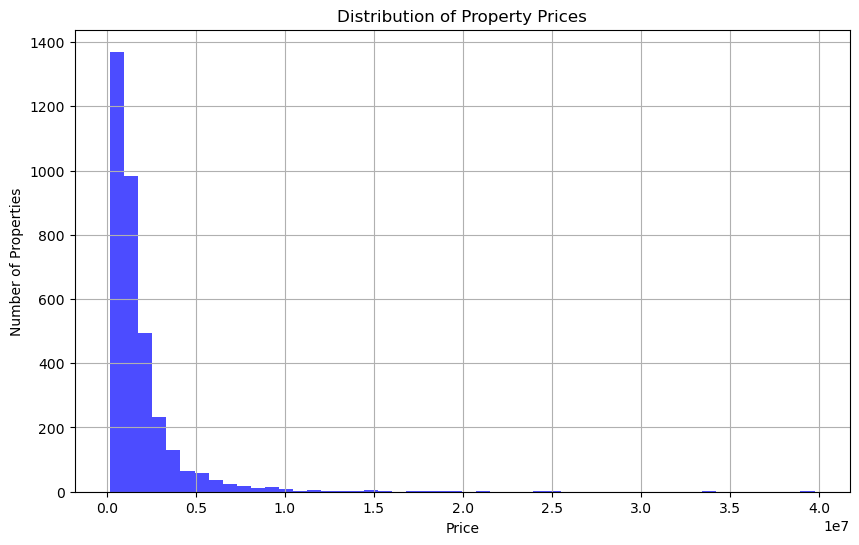

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Number of Properties')
plt.grid(True)
plt.show()


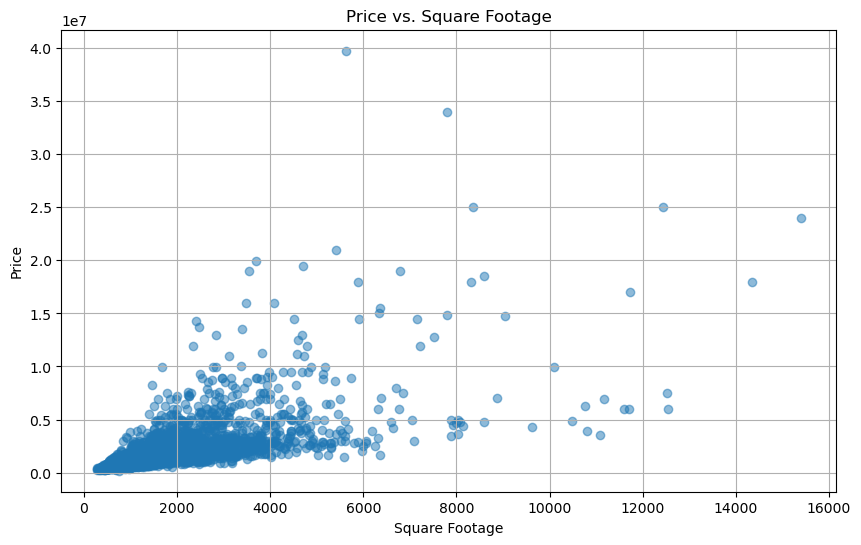

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df['sqft'], df['price'], alpha=0.5)
plt.title('Price vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.grid(True)
plt.show()


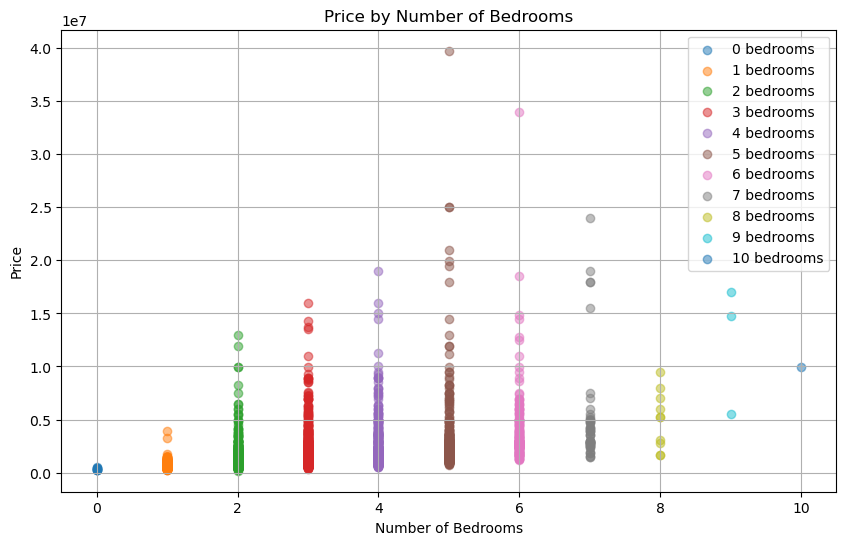

In [11]:
plt.figure(figsize=(10, 6))
for n in sorted(df['bedrooms'].unique()):
    subset = df[df['bedrooms'] == n]
    plt.scatter(subset['bedrooms'], subset['price'], label=f'{n} bedrooms', alpha=0.5)

plt.title('Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# Fill missing values or drop rows/columns with missing data
#df.fillna(df.mean(), inplace=True)  # For numerical columns
df.dropna(inplace=True)  # If you prefer to drop rows with any missing values

# Convert categorical data to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['house_type', 'city'])


In [ ]:
import seaborn as sns

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


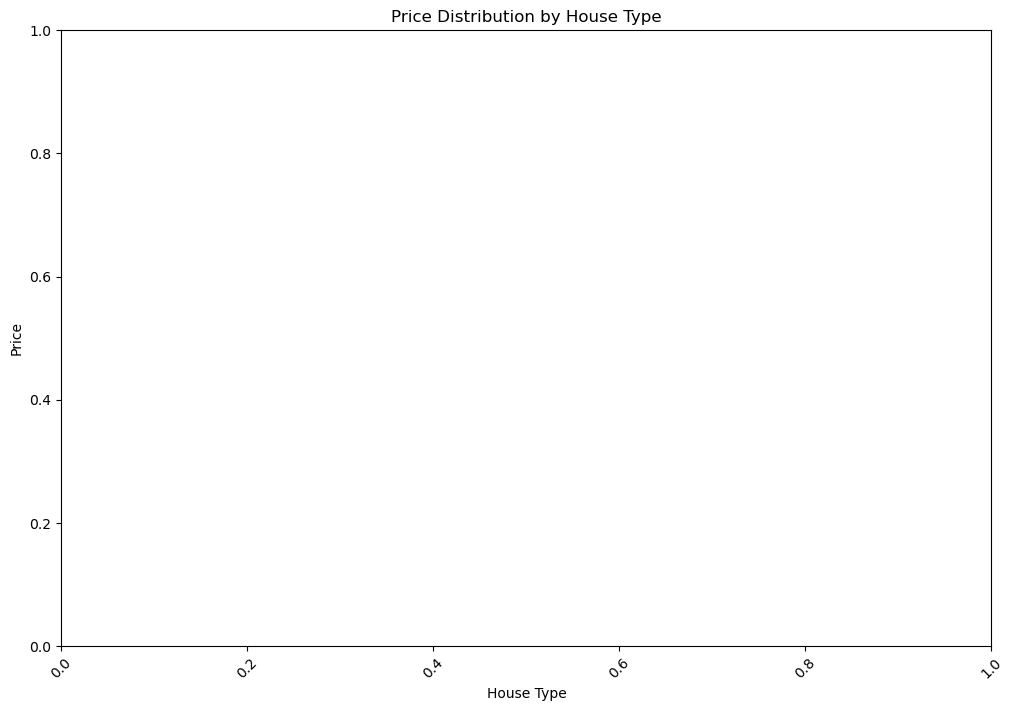

ValueError: Could not interpret input 'house_type'

In [18]:
plt.figure(figsize=(12, 8))
plt.title('Price Distribution by House Type')
plt.xlabel('House Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()
sns.boxplot(x='house_type', y='price', data=df)